# **1.Environment Configuration**
----------

In [86]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation
import warnings

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning
import keras.layers as L             # for easy NN layer access

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error   # for evaluating regression models

# Tabular Data Display
from tabulate import tabulate                   # for creating nicely formatted tables

# Ignore Warnings
warnings.filterwarnings('ignore')               # suppresses unnecessary warnings


In [87]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from ipywidgets import interact, widgets
from IPython.display import HTML, display

In [88]:
pd.set_option('display.max_columns', None)
global df

# **2. Data processing**
-------

In [89]:
df = pd.read_csv('drinking_water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


------------
### Data cleaning

Remove nan data from our data set

----

In [90]:
# Eliminar todas las filas con valores "NaN"
df = df.dropna()

In [91]:
def count__nulls(df):
    # Count number of rows
    n_rows = len(df)
    
    # Count number of missing values in each column
    missing_values = df.isnull().sum()
    
    # Create a new dataframe with missing values
    missing_df = pd.DataFrame({
        'column_name': missing_values.index, 
        'missing_values': missing_values.values
    })
    
    return missing_df

In [92]:
count__nulls(df)

,column_name,missing_values
0,ph,0
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,0
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,0
8,Turbidity,0
9,Potability,0


### Observation of the clean data
----

In [93]:
df.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,333.775777,327.459761,16.140368,78.698446,2.309149,1


In [94]:
features = df.drop('Potability', axis=1)
labels = df['Potability']


In [95]:
negative = np.sum(labels == 0)
positive = np.sum(labels == 1)
difference = abs(negative - positive)
print(f'Negative: {negative}\nPositive: {positive}\nDiference: {difference}')

Negative: 1998
Positive: 1278
Diference: 720


------
# **3. Feature Space and the Curse of Dimensionality**

In [96]:
# Characteristic selection (ph, Hardness)
features_space = features.iloc[:, :2]
labels_space = labels

In [97]:
# Selecting 300 random values from the data, which are assigned to X and Y, labels are assigned to Z
random_values = features_space.sample(n=300)
X_sample = random_values.iloc[:, 0]
Y_sample = random_values.iloc[:, 1]
Z_sample = labels_space[random_values.index]

In [98]:
# Data visualization
for x_val, y_val, z_val in zip(X_sample, Y_sample, Z_sample):
    print(f'X: {x_val}, Y: {y_val}, Z: {z_val}')

X: 7.37533762, Y: 194.8680827, Z: 0
X: 7.766114454, Y: 212.317666, Z: 0
X: 7.384048888, Y: 148.2961767, Z: 0
X: 5.171434094, Y: 207.2805308, Z: 0
X: 5.418503763, Y: 187.7768087, Z: 1
X: 7.119824384, Y: 156.7049933, Z: 0
X: 7.080794504263196, Y: 240.0362787, Z: 1
X: 6.210647606, Y: 192.2167384, Z: 0
X: 3.989032078, Y: 216.0761379, Z: 0
X: 7.080794504263196, Y: 189.0010861, Z: 1
X: 6.309891576, Y: 133.6499247, Z: 1
X: 4.556656719, Y: 156.4229409, Z: 0
X: 7.053116739, Y: 240.8517699, Z: 0
X: 6.528490775, Y: 184.4291595, Z: 1
X: 6.622102936, Y: 196.8910612, Z: 0
X: 7.080794504263196, Y: 200.9699224, Z: 1
X: 7.080794504263196, Y: 176.7721861, Z: 1
X: 5.772718095, Y: 213.3635446, Z: 1
X: 8.468741063, Y: 132.4564835, Z: 1
X: 7.080794504263196, Y: 197.712183, Z: 0
X: 8.842463656, Y: 229.9644224, Z: 1
X: 6.698153869, Y: 198.2862684, Z: 1
X: 7.080794504263196, Y: 230.8094825, Z: 0
X: 4.1502143, Y: 174.9267412, Z: 0
X: 6.90111102, Y: 154.4740917, Z: 0
X: 5.813546488, Y: 184.0317758, Z: 0
X: 9.871

In [99]:
# Selecting random points from "feature_space" and "labels_space" for point and normal assignment
# Using only values whose labels are 1
filtered_indices = labels_space[labels_space == 1].index
filtered_random_values_space = features_space.loc[filtered_indices].sample(n=2)

In [100]:
# Assigning values for points 
x_point = filtered_random_values_space.iloc[0, 0]
y_point = filtered_random_values_space.iloc[0, 1]
z_point = labels_space[filtered_random_values_space.index[0]]

In [101]:
# Assigning values for normal
x_normal = filtered_random_values_space.iloc[1, 0]
y_normal = filtered_random_values_space.iloc[1, 1]
z_normal = labels_space[filtered_random_values_space.index[1]]

In [102]:
# points and normal values
print(f'Points:\n  X: {x_point}, \n  Y: {y_point}, \n  Z: {z_point}')
print(f'Normal:\n  X: {x_normal},\n  Y: {y_normal},\n  Z: {z_normal}')

Points:
  X: 6.450805743, 
  Y: 198.4931562, 
  Z: 1
Normal:
  X: 7.490786676,
  Y: 202.4580608,
  Z: 1


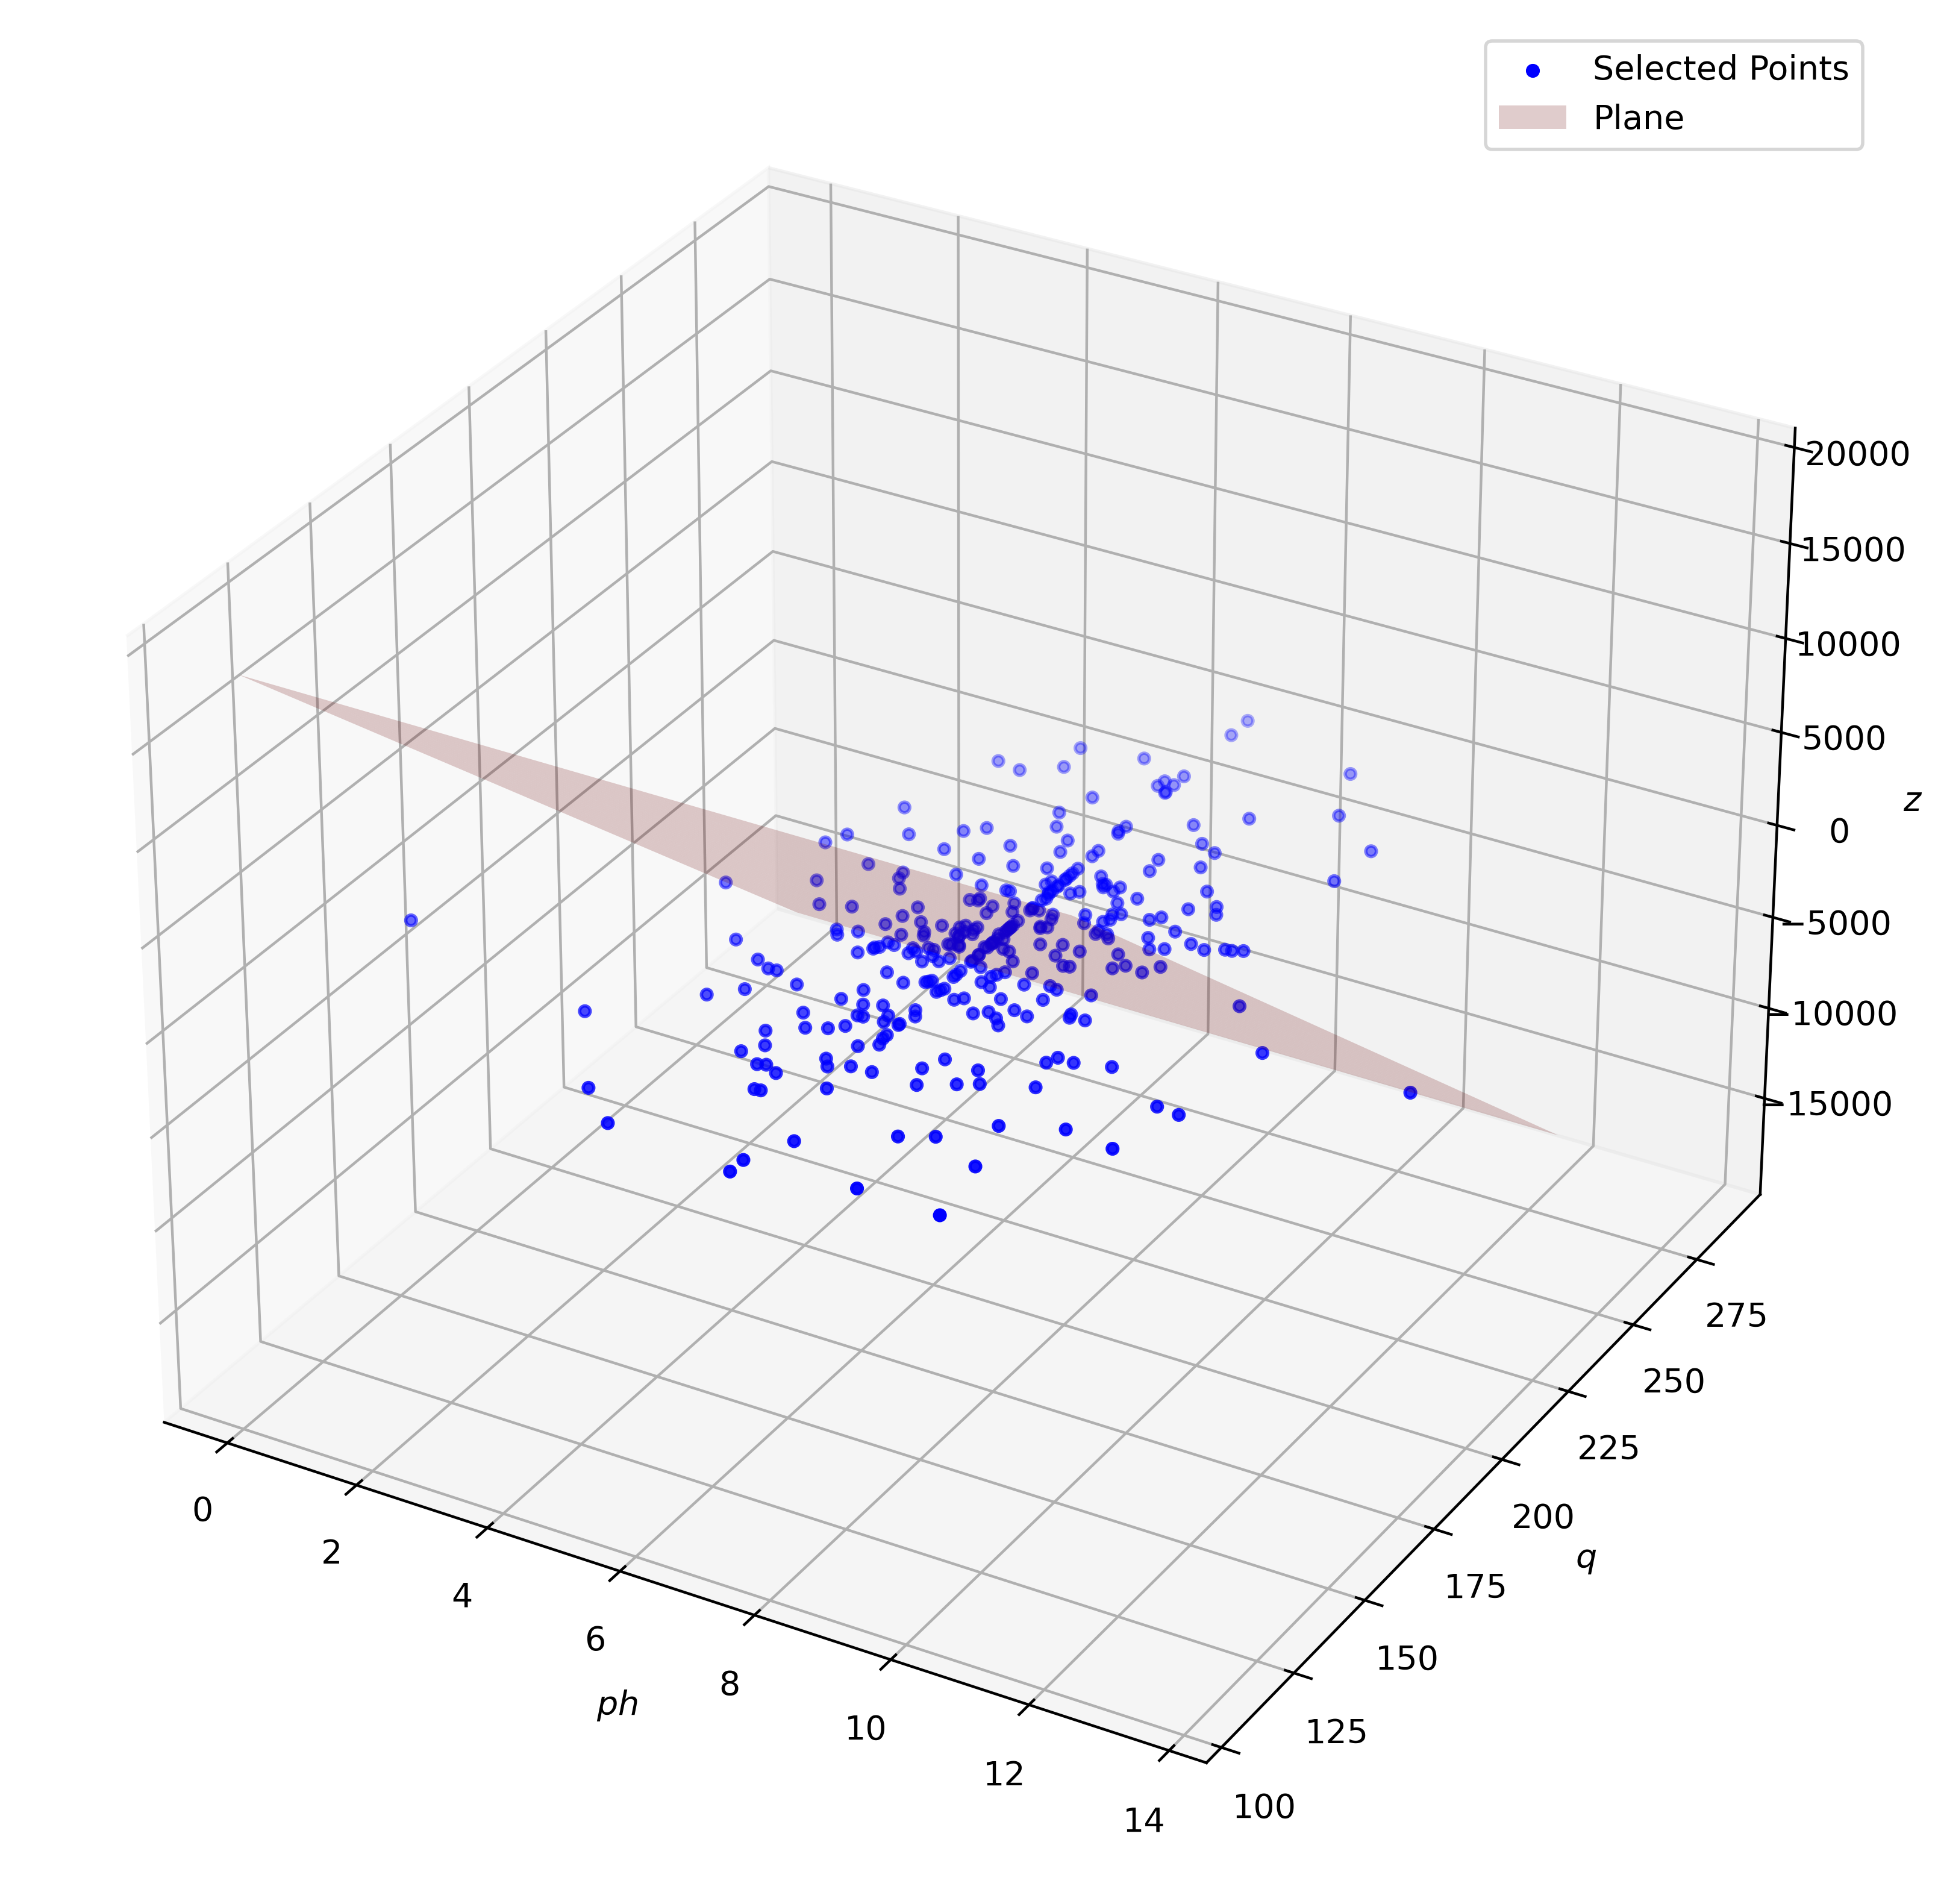

In [103]:
# Figure plot
fig = plt.figure(figsize=(10, 10), dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample, Y_sample, Z_sample, s=10, c='blue', marker='o', label='Selected Points')

# Define the point and the normal vector as arrays
point = np.array([x_point, y_point, z_point])
normal = np.array([x_normal, y_normal, z_normal])

# Calculate the independent term (d) in the plane equation
d = -point.dot(normal)

# Define the plane based on the plane equation
xx, yy = np.meshgrid(range(int(X_sample.min()), int(X_sample.max())), 
                     range(int(Y_sample.min()), int(Y_sample.max())))
z_plane = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# Plot the plane
ax.plot_surface(xx, yy, z_plane, alpha=0.2, color='red', label='Plane')

ax.set_xlabel('$ph$')
ax.set_ylabel('$q$')
ax.set_zlabel('$z$')

ax.legend()

plt.show()

text = f'd = {d}'

display(HTML(f"{text}"))

--------
## **Hypercubes**
---------

In [ ]:
features= df.drop('Potability', axis=1)

In [104]:
# Select the columns for options
column_options = features.columns.tolist()

### Hyper-cubes 1 dimension
-------

In [105]:
def plot_data_1D(column, num_points):
    # Get data from the selected column
    selected_features = features[column]
    selected_labels = labels[features.index]

    # Take the specified number of points
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Create the plot
    plt.figure(figsize=(10, 10), dpi=400)
    plt.scatter(selected_features, np.zeros_like(selected_features),
                c=['blue' if label == 1 else 'red' for label in selected_labels],
                s=10, alpha=0.5, label='Selected Points')
    plt.title(f'Hyper Cube 1D: {column} - {num_points} points')
    plt.show()

In [106]:
interact(plot_data_1D, 
         column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Points:')
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…


### Hyper-cubes 2 dimension
-------

In [107]:
def plot_data_2D(column_1, column_2, num_points):
    # Get data from the selected columns
    selected_features = features[[column_1, column_2]]
    selected_labels = labels[features.index]

    # Take the specified number of points
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Classify points as 0 or 1
    labels_d2 = np.array(['blue' if i == 1 else 'red' for i in selected_labels])
    
    # Create the plot
    plt.figure(figsize=(10, 10), dpi=400)
    plt.scatter(selected_features[column_1], selected_features[column_2], 
                c=labels_d2, s=10, alpha=0.5, label='Selected Points')
    plt.title('Hyper Cube 2D: ' + column_1 + ' vs ' + column_2 + ' - ' + str(num_points) + ' points')
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()


In [108]:
interact(plot_data_2D, 
         column_1=widgets.Dropdown(options=column_options, value=column_options[0], description='Column 1:'),
         column_2=widgets.Dropdown(options=column_options, value=column_options[1], description='Column 2:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Points:')
);

interactive(children=(Dropdown(description='Column 1:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'S…

### Hypercube 3 dimensions
------

In [109]:
def plot_data_3D(column_1, column_2, column_3, num_points):
    # Get data from the selected columns
    selected_features = features[[column_1, column_2, column_3]]
    selected_labels = labels[features.index]

    # Take the specified number of points
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Classify points as 0 or 1
    labels_hy3 = np.array(['blue' if i == 1 else 'red' for i in selected_labels])
    
    # Create the plot
    fig = plt.figure(figsize=(10, 10), dpi=400)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        selected_features.iloc[:, 0],  # Select the first column of the new array (selected_features) (column_1)
        selected_features.iloc[:, 1],  # Select the second column of the new array (selected_features) (column_2)
        selected_features.iloc[:, 2],  # Select the third column of the new array (selected_features) (column_3)
        c=labels_hy3,
        cmap='viridis',
    )
    ax.set_title('Hyper cube 3D: ' + column_1 + ' vs ' + column_2 + ' vs ' + column_3 + ' - ' + str(num_points) + ' points')
    ax.set_xlabel(column_1)  # Use the name of the selected column
    ax.set_ylabel(column_2) 
    ax.set_zlabel(column_3)  
    plt.show()


In [110]:
interact(plot_data_3D, 
         column_1=widgets.Dropdown(options=column_options, value=column_options[0], description='Select column 1:'),
         column_2=widgets.Dropdown(options=column_options, value=column_options[1], description='Select column 2:'),
         column_3=widgets.Dropdown(options=column_options, value=column_options[2], description='Select column 3:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Total points:')
);

interactive(children=(Dropdown(description='Select column 1:', options=('ph', 'Hardness', 'Solids', 'Chloramin…

# **4. Exploration of the Curse of Dimensionality**
------
Let's write a generalized function to find the proportion of outside points to total points for an $n$ dimensional hyper_cube and plot the proportion per dimensionality from 1 to 1000 dimensions.


###### **prop:** Controla la proporción del rango de posiciones aleatorias que se considerará para determinar si un punto está fuera del hipercubo. Un valor más bajo hará que el rango permitido sea más pequeño, mientras que un valor más alto hará que el rango permitido sea más grande.

###### **dism:** Es la cantidad de dimensiones en el conjunto de datos, es decir, el número de columnas.

###### **num:** Representa la cantidad de puntos que se generarán aleatoriamente para realizar el análisis. En este caso, se establece en el 50% del total de puntos (totalPoints * 0.5).

In [111]:
def hyper_cube(dataset, prop=0.5, showBar=True):
    outsidePoints = 0
    totalPoints = len(dataset)
    
    dism = len(dataset.columns)
    num = int(totalPoints * 0.5)

    if showBar:
        barfunc = lambda x: tqdm(x)
    else:
        barfunc = lambda x: x

    for point in barfunc(range(num)):
        for dim in range(dism):
            randPos = np.random.uniform(0, 1)
            if randPos < (1 - prop) / 2 or randPos > 1 - (1 - prop) / 2:
                outsidePoints += 1
                break

    return outsidePoints / totalPoints


x = dimensions

y = percent outside points

In [112]:
df.shape

(3276, 10)

In [113]:
x = range(1, df.shape[1])
y = []

In [114]:
for dim in tqdm(x):
    y.append(hyper_cube(df.iloc[:, :dim + 1], showBar=False))

  0%|          | 0/9 [00:00<?, ?it/s]

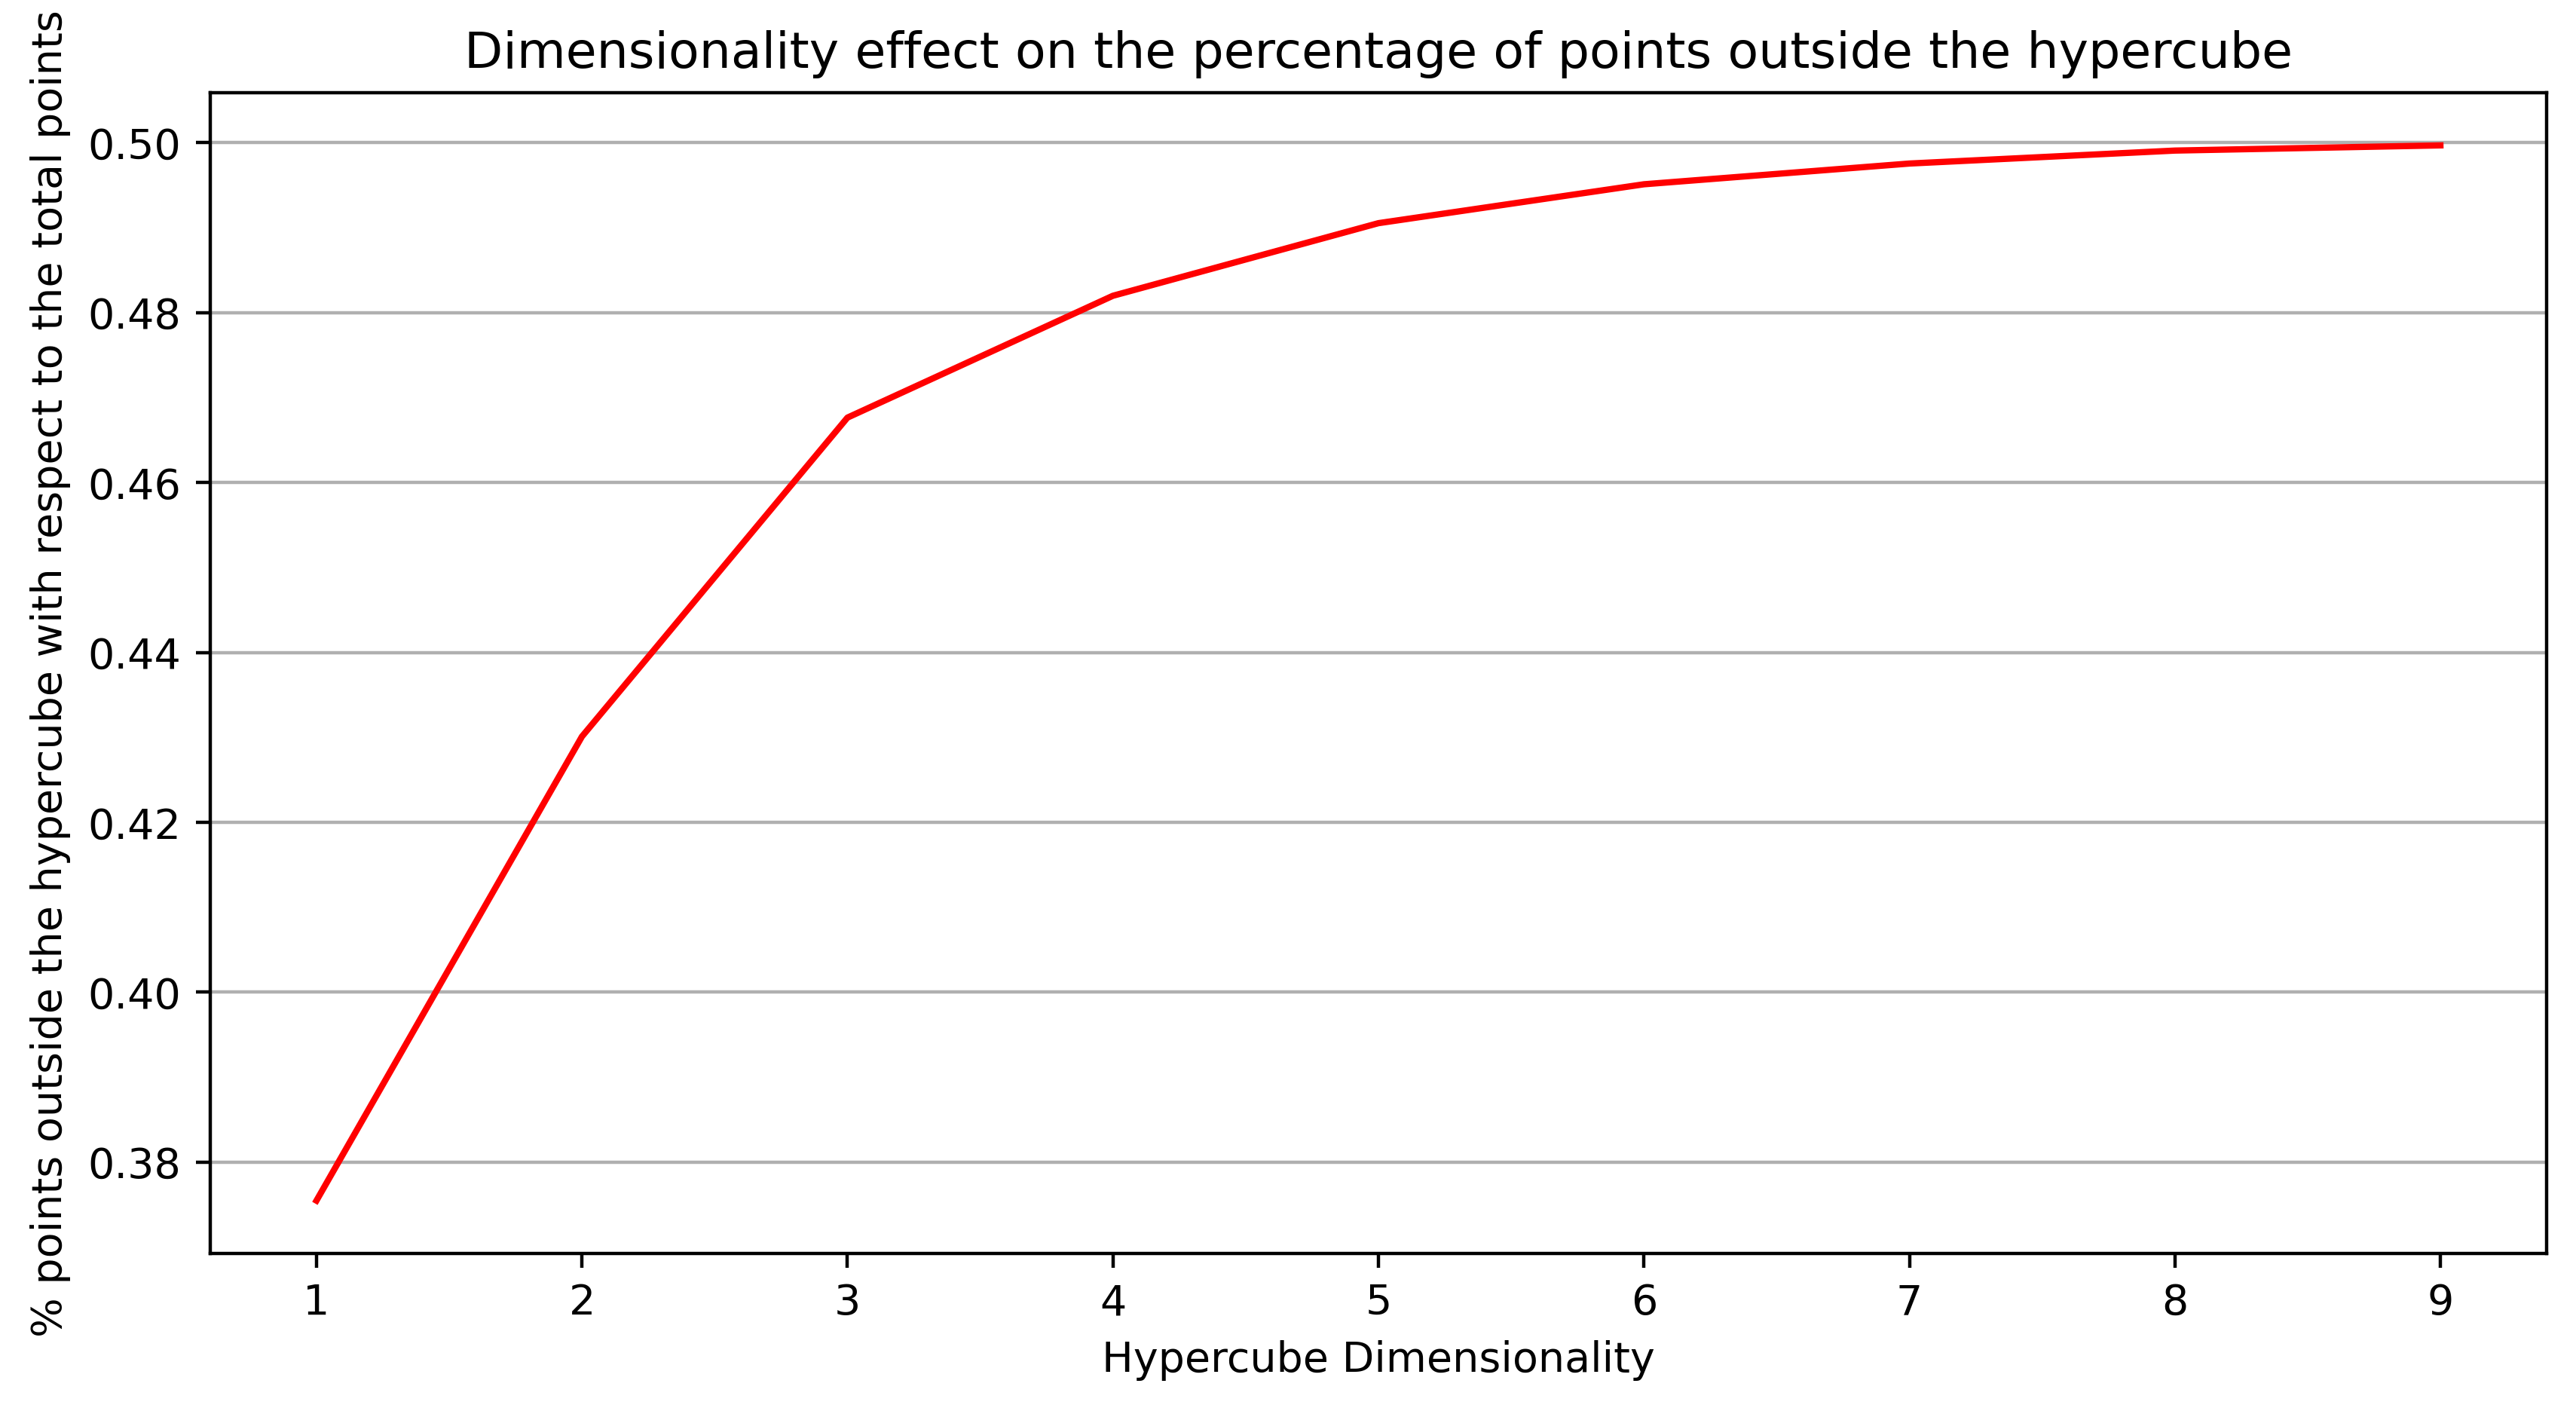

In [115]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(x, y, color='red')
plt.ylabel('% points outside the hypercube with respect to the total points')
plt.xlabel('Hypercube Dimensionality')
plt.title('Dimensionality effect on the percentage of points outside the hypercube')
axes = plt.gca()
axes.yaxis.grid()
plt.show()

percent_outside_points = hyper_cube(df, showBar=False)
text = f'Percentage of points outside the hypercube: {percent_outside_points:.2%}'

display(HTML(f"{text}"))

----------

The distance between the second longest distance of two points and the longest distance of two points changes to zero as the dimensionality of a hyper_cube increases.

$$labels = √(features) - √(features -1)$$

In [116]:
def distance_points(column):
    # Select columns
    random_values = features.sample(n=200)
    features_space = random_values[[column]]
    
    # Order the values from smallest to largest
    features_space = features_space.sort_values(by=column)
    
    # Calculate the distance between the points
    labels_space = np.sqrt(features_space[column]) - np.sqrt(features_space[column] - 1)
    
    # Create the plot
    plt.figure(figsize=(10, 5), dpi=400)
    plt.plot(features_space[column], labels_space, color='red')
    axes = plt.gca()
    axes.yaxis.grid()
    plt.title(f'{column}')
    plt.ylabel('Distance ($\sqrt{n} - \sqrt{n-1}$)')
    plt.xlabel('Dimensionality ($n$)')
    plt.show()

In [117]:
interact(distance_points, 
         column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:')
);      

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

# **5. Optimization and Gradient Descent**
-----------

In [118]:
def lost_function_optimization(column):
    # Selection and assignment of values
    features_gradient = np.linspace(features[column].min(), features[column].max(), 100)
    targets = np.sin(features_gradient) + features_gradient**2/10 + 1
    
    # Ascending order of features
    sorted_targets = np.sort(targets)
    sorted_features = features_gradient[np.argsort(targets)]
    
    # Selection of minimum values
    lowest_feature = sorted_features[0]
    lowest_label = sorted_targets[0]
    
    f = lambda x:np.sin(x) + x**2/10 + 1
    
    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    # Punto de interés
    plt.scatter([lowest_feature], [lowest_label], color='black', marker='x', s=200)

    # Línea roja de la función objetivo
    x = np.linspace(features_gradient.max(), features_gradient.min(), 10)
    
    '''
    dx = [x[i+1]-x[i] for i in range(len(x[:-1]))]
    dy = [f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]
    
    is equal to:
    dx = np.diff(x)
    dy = np.diff(f(x))
    '''
    
    dx = np.diff(x)
    dy = np.diff(f(x))
    axes.quiver(x[:-1], 
                f(x)[:-1], 
                dx, 
                dy, 
                angles='xy', 
                scale_units='xy', 
                scale=1,
                linestyle='--', 
                width=0.005, 
                color='red')

    # Gráfico de la función objetivo
    plt.plot(features_gradient, targets, color='black')
    plt.title(f'Optimization of the Loss Function: {column}')
    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()
    
    

In [119]:
# Display of lost function optimization
interact(
    lost_function_optimization, 
    column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:')    
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

Draw several minimizations of gradient decline with the formula: $\sin x + \frac{x^2}{10} + 1$.

In [120]:
def plot_gd_min(column, learn_rate= 0.5, curr_x=6):
    
    cost = lambda x: np.sin(x) + x**2/10 + 1
    gradient = lambda x: np.cos(x) + 2*x / 10

    x_values = []
    for iteration in range(10):
        x_values.append(curr_x)
        curr_x += -learn_rate * gradient(curr_x)

    features_gradient = np.linspace(features[column].min(), features[column].max(), 100)
    targets = np.sin(features_gradient) + features_gradient**2/10 + 1
   #features_gradient = features_gradient.reshape(-1, 1)

    f = lambda x: np.sin(x) + x**2/10 + 1
#------------------------------
    # Ascending order of features
    sorted_targets = np.sort(targets)
    sorted_features = features_gradient[np.argsort(targets)]
    
    # Selection of minimum values
    lowest_feature = sorted_features[0]
    lowest_label = sorted_targets[0]

    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    # Point of interest
    plt.scatter(lowest_feature, lowest_label, color='black', marker='x', s=200)

    x_values = np.array(x_values)
    
    '''
        ([x_values[i+1]-x_values[i] for i in range(len(x_values[:-1]))]),
        ([f(x_values)[i+1]-f(x_values)[i] for i in range(len(f(x_values)[:-1]))])
    '''
    
    dx = np.diff(x_values)
    dy = np.diff(f(x_values))
    
    axes.quiver(x_values[:-1],
                f(x_values)[:-1],
                dx,
                dy,
                angles='xy',
                scale_units='xy',
                scale=1,
                linestyle='--',
                width=0.005,
                color='red')

    plt.plot(features_gradient, targets, color='black')

    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()

In [121]:
interact(
    plot_gd_min,
    column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:'),
    learn_rate=widgets.FloatSlider(min=-1, max=1, step=0.01, value=0.1, description='Learning Rate:',),
    curr_x=widgets.FloatSlider(min=-10, max=10, step=0.1, value=3, description='Initial Value:')
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

# **6. Metrics and Evaluation**
------------

## **6.1 Example of Regression and Classification**
-----

In [122]:
# Regression simulation
y_reg_true = df['ph'] + np.random.normal(0, 5, len(df))  # Ajusta según la columna que quieras predecir
y_reg_pred = df['ph'] + np.random.normal(0, 5, len(df))

In [123]:
# Clasification simulation
# This example potability is the column to classify
y_class_true = df['Potability']  # Fit according to column

In [124]:
# Prediction simulation for classification (potability values)
y_class_pred = np.random.uniform(0, 1, len(df))

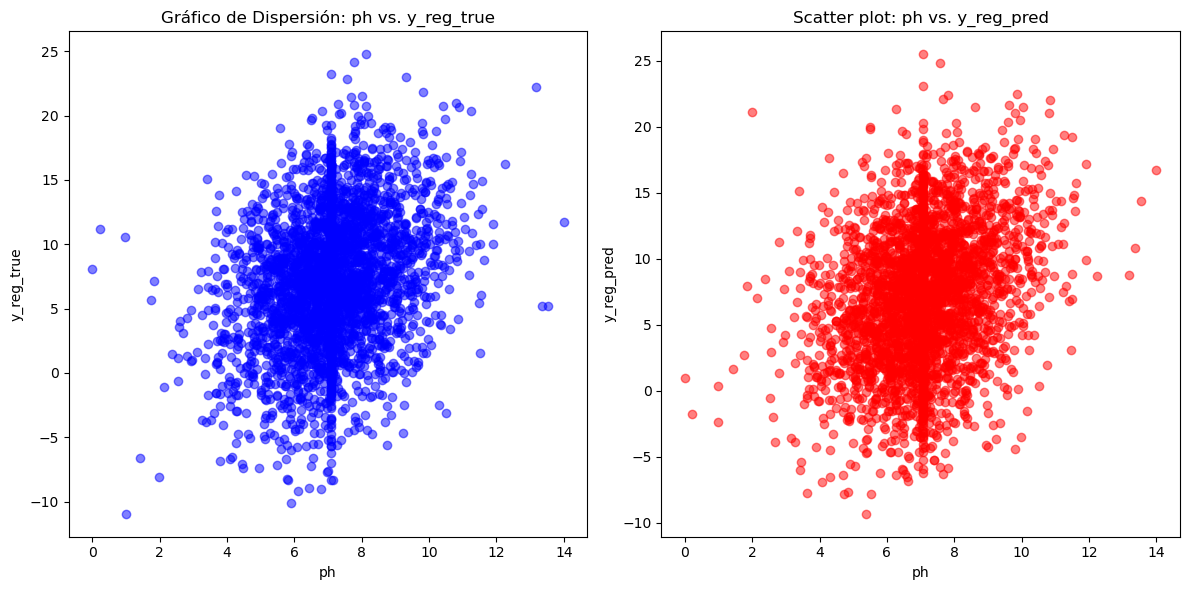

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['ph'], y_reg_true, alpha=0.5, color='blue')
plt.title('Gráfico de Dispersión: ph vs. y_reg_true')
plt.xlabel('ph')
plt.ylabel('y_reg_true')

plt.subplot(1, 2, 2)
plt.scatter(df['ph'], y_reg_pred, alpha=0.5, color='red')
plt.title('Scatter plot: ph vs. y_reg_pred')
plt.xlabel('ph')
plt.ylabel('y_reg_pred')

plt.tight_layout()
plt.show()

## **6.2 Mean Absolute Error (MAE)**
______

In [126]:
# Implementation in NumPy
def mean_absolute_error(y_true, y_pred):
    # Check if y_true and y_pred are the same shape
    assert y_pred.shape == y_true.shape
    return np.sum(np.abs(y_true - y_pred)) / len(y_pred)

In [127]:
print(f"Numpy Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Numpy Implementation of MAE: 5.662374064379219


In [128]:
# Implementation in Sklearn
from sklearn.metrics import mean_absolute_error

# Usage
print(f"Sklearn Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Sklearn Implementation of MAE: 5.662374064379219


## **6.3 Root Mean Squared Error (RMSE)**
---------

In [129]:
print(f"RMSE: {mean_squared_error(y_reg_true, y_reg_pred) ** (1/2)}")

RMSE: 7.081693510362382


## **6.4 Area Under Receiver Operating Characteristics Curve (AUC-ROC)**
-----------

In [130]:
def get_tpr_fpr(y_pred, y_true):
    tp = (y_pred == 1) & (y_true == 1)
    tn = (y_pred == 0) & (y_true == 0)
    fp = (y_pred == 1) & (y_true == 0)
    fn = (y_pred == 0) & (y_true == 1)

    tpr = tp.sum() / (tp.sum() + fn.sum())
    fpr = fp.sum() / (fp.sum() + tn.sum())

    return tpr, fpr

In [131]:
def roc_curve(y_pred, y_true, n_thresholds=15000):
    fpr_thresh = []
    tpr_thresh = []
    for i in range(n_thresholds + 1):
        
        threshold_vector = (y_pred >= i/n_thresholds)
        tpr, fpr = get_tpr_fpr(threshold_vector, y_true)
        fpr_thresh.append(fpr)
        tpr_thresh.append(tpr)
        
    return tpr_thresh, fpr_thresh

In [132]:
# Implementation in Numpy
def area_under_roc_curve(y_true, y_pred):
    fpr, tpr = roc_curve(y_pred, y_true)
    rectangle_roc = 0
    for k in range(len(fpr) - 1):
            rectangle_roc = rectangle_roc + (fpr[k]- fpr[k + 1]) * tpr[k]
    return 1 - rectangle_roc

In [133]:
from sklearn.metrics import roc_auc_score
print(f"Numpy Implementation of ROC-AUC: {area_under_roc_curve(y_class_true, y_class_pred)}")
print(f"Sklearn implementation of ROC-AUC: {roc_auc_score(y_class_true, y_class_pred)}")

Numpy Implementation of ROC-AUC: 0.501206214038765
Sklearn implementation of ROC-AUC: 0.5012430270646233


## **6.5 Precision and Recall**
----------

In [134]:
# Convert probability values into integers
y_class_pred = np.rint(y_class_pred)

In [135]:
# Precision
# number of correctly classified positive values/number of all predicted positive values
def precision(y_true, y_pred):
    assert y_true.shape == y_pred.shape    
    return ((y_pred == 1) & (y_true == 1)).sum() / y_pred.sum()
print(f"Numpy Precision: {precision(y_class_true, y_class_pred)}")

Numpy Precision: 0.387987987987988


In [136]:
# Recall
# number of correctly classified positive values/number of all true positive values
def recall(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return ((y_pred == 1) & (y_true == 1)).sum() / y_true.sum()
print(f"Numpy Recall: {recall(y_class_true, y_class_pred)}")

Numpy Recall: 0.5054773082942097


In [137]:
from sklearn.metrics import recall_score, precision_score
print(f"Sklearn Precision {precision_score(y_class_true, y_class_pred)}")
print(f"Sklearn Recall: {recall_score(y_class_true, y_class_pred)}")

Sklearn Precision 0.387987987987988
Sklearn Recall: 0.5054773082942097


## **6.6 Accuracy**
-------

In [138]:
def accuracy(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    # returns a boolean array(of 1s and 0s) indicating if element of both arrays match
    return np.average(y_true == y_pred)

from sklearn.metrics import accuracy_score

print(f"Numpy Accuracy: {accuracy(y_class_true, y_class_pred)}")
print(f"Sklearn Accuracy: {accuracy_score(y_class_true, y_class_pred)}")

Numpy Accuracy: 0.49603174603174605
Sklearn Accuracy: 0.49603174603174605


## **6.7 F1 Score**
-----------

In [139]:
# F1 Score
# Harmonic Mean of Precision and Recall

def f1_score(y_true, y_pred):
    return (2*precision(y_true, y_pred)*recall(y_true, y_pred)) / (precision(y_true, y_pred)+recall(y_true, y_pred))

print(f"Numpy Implementation of F1 Score: {f1_score(y_class_true, y_class_pred)}")
    
from sklearn.metrics import f1_score

print(f"Sklearn Implementation of F1 Socre: {f1_score(y_class_true, y_class_pred)}")

Numpy Implementation of F1 Score: 0.43900781515460413
Sklearn Implementation of F1 Socre: 0.43900781515460413


# **7. Algorithms**
----

In [140]:
from sklearn.model_selection import train_test_split
from collections import Counter

## **7.1 K-Nearest Neighbors (KNN)**
______

##### Calcula la distancia de **Minkowski** entre dos vectores x e y con un parámetro de potencia p.

$D(x,y)=(∑ i=1n ∣x i​ −y i​ ∣ p ) 1/p$

In [141]:
def minkowski_distance(x, y, p=4):
    return (np.abs(x - y)**p).sum()**(1/p)

In [142]:
# Select two rows from your dataset to calculate the Minkowski distance between them
row_index_1 = 0  # Choose the index of the first row
row_index_2 = 1  # Choose the index of the second row

In [143]:
# Extract the values of the selected rows
point_1 = df.iloc[row_index_1, :-1].values  # Exclude the last column (Potability)
point_2 = df.iloc[row_index_2, :-1].values

In [144]:
# Calculate the Minkowski distance between the two points
distance = minkowski_distance(point_1, point_2)

In [145]:
# Print the result
print(f"Distance between row {row_index_1} and row {row_index_2}: {distance}")

Distance between row 0 and row 1: 2161.261997756129


In [146]:
from sklearn.decomposition import PCA

In [147]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df.iloc[:, :-1])

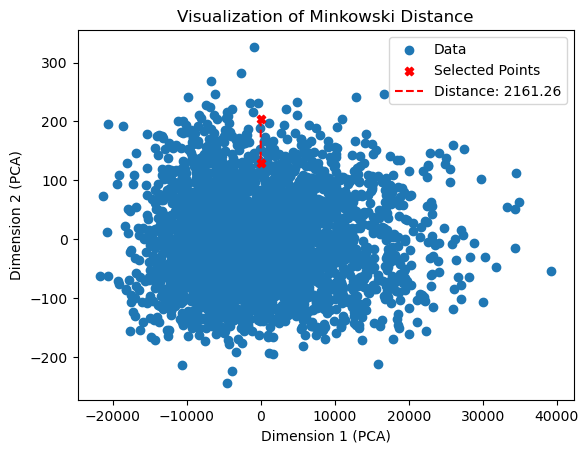

In [148]:
# Plot the two-dimensional space with the two points and the distance
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Data')
plt.scatter([point_1[0], point_2[0]], [point_1[1], point_2[1]], c='red', marker='X', label='Selected Points')
plt.plot([point_1[0], point_2[0]], [point_1[1], point_2[1]], linestyle='--', color='red', label=f'Distance: {distance:.2f}')
plt.legend()
plt.xlabel('Dimension 1 (PCA)')
plt.ylabel('Dimension 2 (PCA)')
plt.title('Visualization of Minkowski Distance')
plt.show()

------

In [149]:
def calculate_distance(X_train, single_test, distance_function):
    distances = []
    
    for single_train in X_train:
        single_distance = distance_function(single_train, single_test)
        distances.append(single_distance)
    
    return distances

In [150]:
# Choose two row indices to calculate the distance between them
row_index_1 = 0
row_index_2 = 1

In [151]:
# Extract the values of the selected rows
point_1 = df.iloc[row_index_1, :-1].values  # Exclude the last column (Potability)
point_2 = df.iloc[row_index_2, :-1].values

In [152]:
# Create the training set (for example, the entire dataset except the two selected rows)
X_train = df.iloc[:, :-1].values

In [153]:
# Calculate the distances between the two selected rows and the training set using the calculate_distance function
distances = calculate_distance(X_train, point_1, minkowski_distance)


In [154]:
# Print the distances for each point in the training set
print("Distances for point 1:")
print(distances)

# Calculate the Minkowski distance between the two points directly
direct_distance = minkowski_distance(point_1, point_2)
print(f"\nDirect distance between point 1 and point 2: {direct_distance}")

Distances for point 1:
[0.0, 2161.261997756129, 881.9421871073282, 1227.3194381958517, 2812.341390312185, 7957.371982633943, 7958.40063919931, 7119.227277620376, 6505.736121076917, 4693.189514585915, 11661.295489590288, 2023.7108136245038, 2060.569949783812, 6540.044045034536, 7596.6860278010545, 20273.91578015744, 10189.282721454167, 3250.007875127215, 1330.9573405747005, 4839.001238483785, 1514.2487699678625, 10153.044613710119, 3684.0961120304382, 377.1525144178262, 3524.7260752309053, 429.0528646077558, 12633.449729230202, 7566.386218023534, 5571.648358125675, 5597.905547140546, 5595.092470425088, 1113.4552053843581, 1535.6142023143013, 11764.533643308174, 6004.113943670196, 1170.809739567281, 3960.754203211763, 3509.348652401547, 849.197318249466, 3892.4079763520217, 9087.395786314182, 4132.452281965034, 7989.022877949432, 10817.38548470424, 777.4628496830721, 14815.121201088934, 10216.132912464109, 5032.584951349934, 13624.534182499989, 745.3031206089877, 6700.989232185088, 8777.

-----------

In [155]:
def knn_predict_single(distances, y_train, k=7):
    
    # Convert distances to series with the index being the index of y_train
    distances = pd.Series(distances, index=list(range(len(y_train))))
    
    # Sort values and select first K elements while preserving index
    k_neighbors = distances.sort_values()[:k]
    
    # Create list with the lables of each `k_neighbor`
    counter = Counter(y_train[k_neighbors.index])
        
    # Most common label in the list
    prediction = counter.most_common()[0][0]
    
    return prediction

In [156]:
# Choose two row indices to calculate the distance between them
row_index_1 = 0
row_index_2 = 1


In [157]:
# Extract the labels of the selected rows
y_train = df['Potability'].values


In [160]:
# Calculate the distances between the first point and the training set using the calculate_distance function
distances = calculate_distance(X_train, point_1, minkowski_distance)

# Use the knn_predict_single function to predict the label of point 1
knn_prediction = knn_predict_single(distances, y_train)


In [161]:
# Print the prediction
print(f"Prediction for point 1: {knn_prediction}")

Prediction for point 1: 0


------